Attempting to predict the variables that determine if blue side wins: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min.

The goal of analysing this dataset is to inform high-elo League of Legends players the key metrics to focus on in the first 10 minutes ie. the 'Laning Phase' (Ferrari, 2013) in order to maximise your chances of winning the game overall.

The goal is also to two statistical methods on a single dataset then potentially use it to train a logistic regression model: 

    1. Factor Analysis

    2. Principal Component Analysis

Both of these methods (in my opinion) aren't well documented, so hopefully this will be relevant for some who were as lost as I was! Throughout this notebook, I've placed some references and consolidated pieces of their methodologies here.

    Please note that this data captures the first 10 minutes of a game. In a 30-40 minute game, a lot of 'comebacks' can happen, so our final accuracy will not be 'overly' magnificent. 
    
    From other individuals who have analysed this dataset, a 70-75% final accuracy seems to be the concensus. 
    
    Therefore, having a strong advantage in the 1st 10 minutes of the game would mean your team had a 70-75% chance of winning the game overall.

First, load packages.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.datasets
from matplotlib import pyplot as plt
from factor_analyzer import FactorAnalyzer

Next, load dataset.

In [2]:
lol = pd.read_csv('league.csv')
lol.info()
pd.options.display.max_columns = None
lol.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [3]:
#We'll drop missing values rows. No need to as there are 9879 non-null vlaues for each column for the total 9879 entries. Still good practice:
lol.dropna(inplace=True)

In [4]:
#setting up our new DataFrame for Factor Analysis: df_fa
df_clean = lol.copy()
df_clean.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


Cleaning up our dataframe:

In [5]:
#We're going to eliminate variables with reasons why:
#1. gameId is an obvious candidate to eliminate since the unique ID and how it varies plays no role. 
df_clean = df_clean.drop('gameId',axis=1)
#2. For the purpose of FA, we can drop blueWins (although we will retain it for regression later).
df_clean = df_clean.drop('blueWins',axis=1)
y = lol['blueWins']
#3. We can eliminate elite monster kills as it can be derived from dragon kills + herald kills.
df_clean = df_clean.drop('blueEliteMonsters',axis=1)
df_clean = df_clean.drop('redEliteMonsters',axis=1)
#4. blueFirstBlood has a perfect negative correlation with redFirstBlood, so we'll drop one of them.
df_clean = df_clean.drop('redFirstBlood',axis=1)
#5. blueGoldDiff/blueExperienceDiff are calculated variables too -> blueTotalGold - redTotalGold & blueTotalExperience - redTotalExperience.
df_clean = df_clean.drop('blueGoldDiff',axis=1)
df_clean = df_clean.drop('redGoldDiff',axis=1)
df_clean = df_clean.drop('blueExperienceDiff',axis=1)
df_clean = df_clean.drop('redExperienceDiff',axis=1)
#6. Because the dataset's context is game stats until the 10 minute mark, GPM and XPM are literally just total gold/exp divided by 10. We can drop them.
df_clean = df_clean.drop('blueCSPerMin',axis=1)
df_clean = df_clean.drop('redCSPerMin',axis=1)
df_clean = df_clean.drop('blueGoldPerMin',axis=1)
df_clean = df_clean.drop('redGoldPerMin',axis=1)
#7. blueKills has a perfect negative correlation with redDeaths & blueDeaths has a perfect negative correlation with blueDeaths.
df_clean = df_clean.drop('redKills',axis=1)
df_clean = df_clean.drop('redDeaths',axis=1)
#8. While not perfectly correlated, avglevel and totalExperience are highly correlated. We will drop one of them to avoid colinearity. Because leveling up becomes incrementally more difficult as you grow in levels, the average level is not the best indication of experience. Better to keep total experience as a better indication.
df_clean = df_clean.drop('blueAvgLevel',axis=1)
df_clean = df_clean.drop('redAvgLevel',axis=1)

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9879 entries, 0 to 9878
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   blueWardsPlaced               9879 non-null   int64
 1   blueWardsDestroyed            9879 non-null   int64
 2   blueFirstBlood                9879 non-null   int64
 3   blueKills                     9879 non-null   int64
 4   blueDeaths                    9879 non-null   int64
 5   blueAssists                   9879 non-null   int64
 6   blueDragons                   9879 non-null   int64
 7   blueHeralds                   9879 non-null   int64
 8   blueTowersDestroyed           9879 non-null   int64
 9   blueTotalGold                 9879 non-null   int64
 10  blueTotalExperience           9879 non-null   int64
 11  blueTotalMinionsKilled        9879 non-null   int64
 12  blueTotalJungleMinionsKilled  9879 non-null   int64
 13  redWardsPlaced                987

Observing the correlation matrix: (Note that 23 dimensions is still extremely high, and we are looking to reduce this by a substantial amount while minimising the loss of information by removing variables)

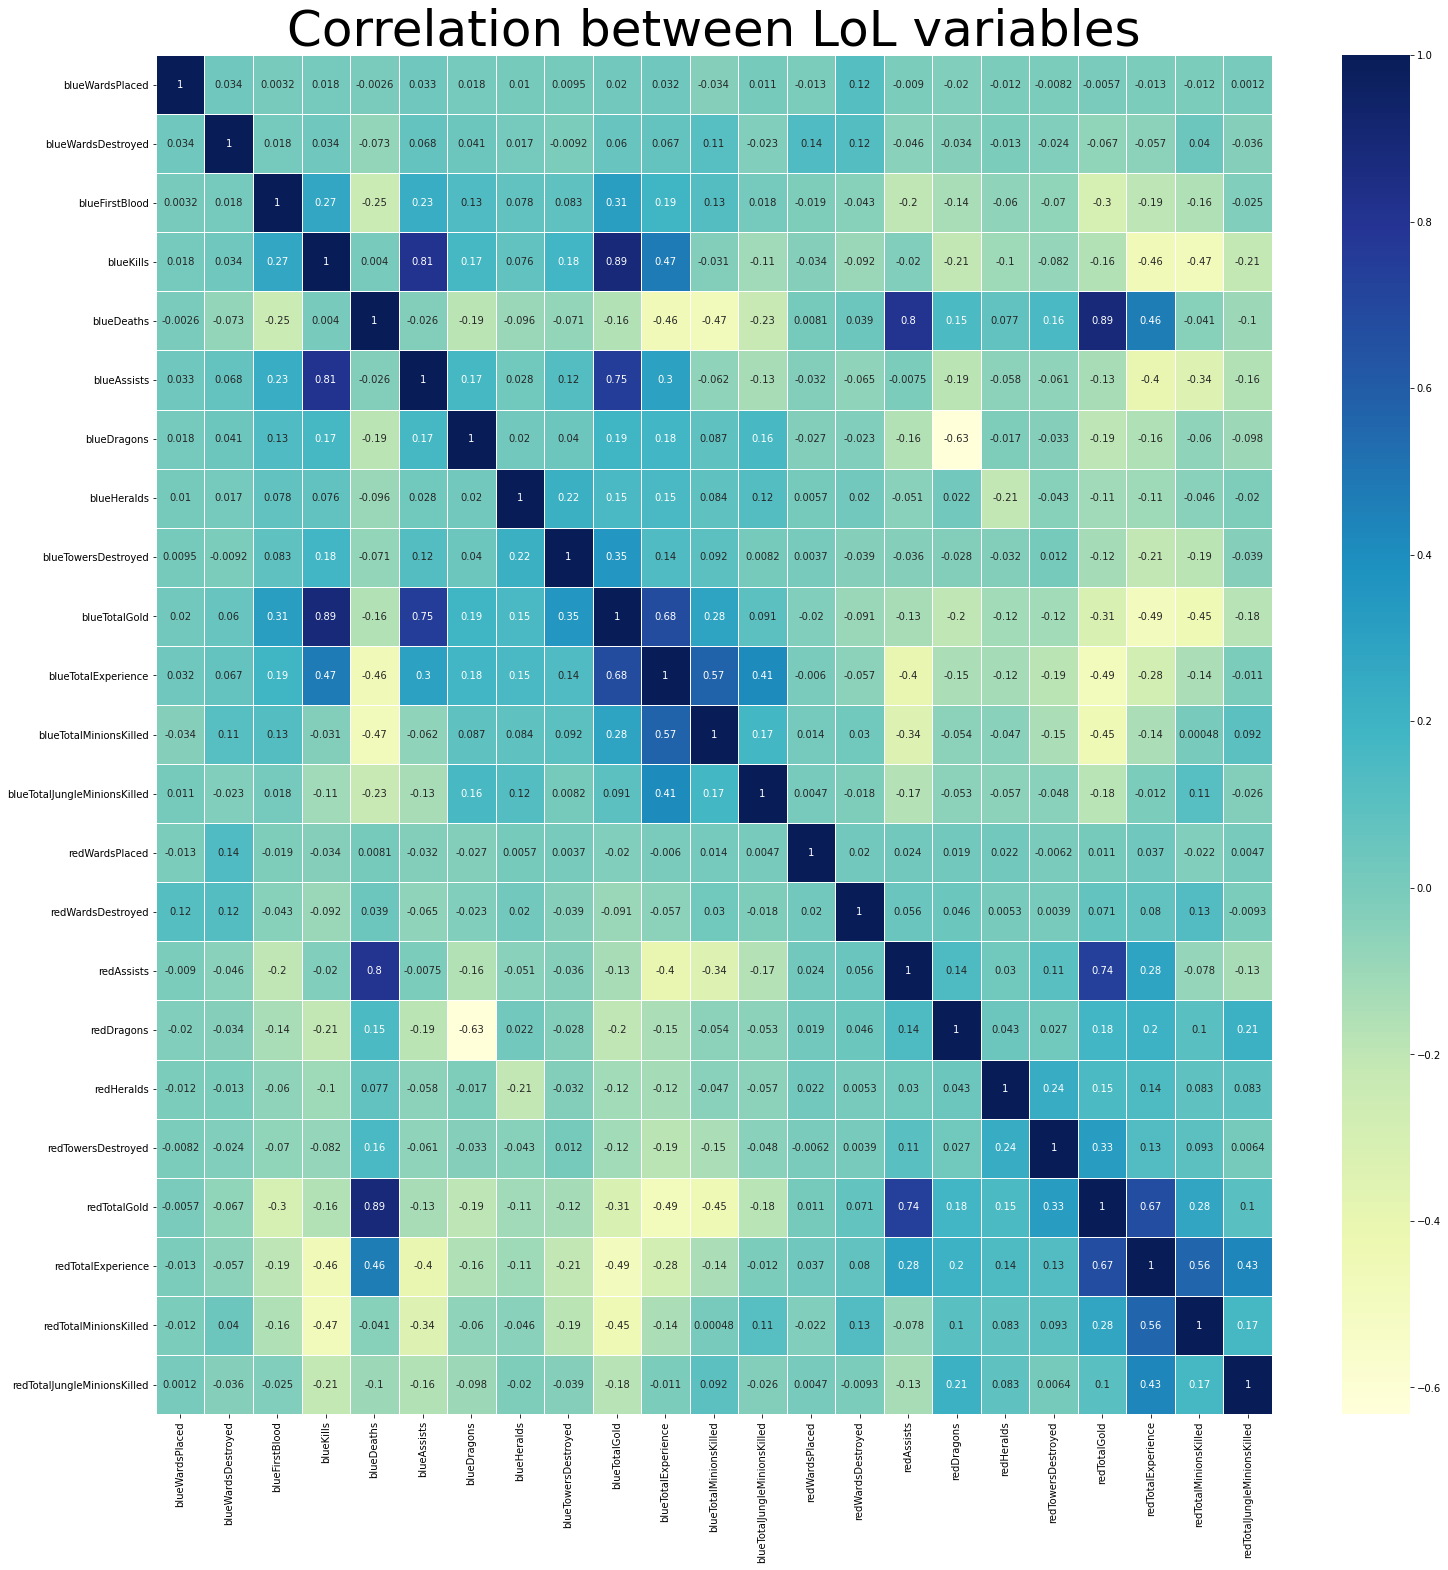

In [7]:
fig, ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(df_clean.corr(), annot=True, ax=ax, cmap="YlGnBu", linewidths = .5); ax.set_title("Correlation between LoL variables", fontsize = 50)
plt.show()
#we can see there is still high colinearity between some variables, but for now we've eliminated most of the variables which would've had correlations > 0.9 with our retained variables. We'll continue to proceed with what we have, but we'll look to eliminate a lot more variables!

Quickly check the correlation between our chosen variables and 'blueWins':

<AxesSubplot:title={'center':'Correlation with winning'}>

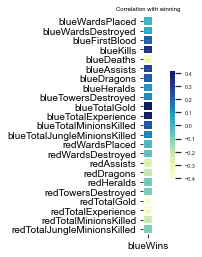

In [8]:
win = pd.DataFrame({'blueWins':df_clean.corrwith(y,axis=0)})
fig, ax = plt.subplots()
x_labels = ['blueWins']
y_labels = df_clean.columns.tolist()
sns.set(font_scale=0.5)
plt.title('Correlation with winning')
sns.heatmap(win,cmap="YlGnBu", xticklabels = x_labels, yticklabels = y_labels, center=0, square=True, linewidths=0.05,cbar_kws={"shrink": 0.5}, annot = True, annot_kws={"fontsize":1})

We could naively conclude (simply from the correlation matrix analysis) that the more kills, gold and experience Blue team has, the more likely they are going to win. Similarly, the more kills, gold and experience Red team has, the more likely Blue Team will lose. But we want more than just that!

<u><b>Factor Analysis</b></u>

The first method we will try out is Exploratory Factor Analysis (FA). FA will determine a 'cluster' of factors that are significant to the dataset. FA can be difficult compared to Principal Component Analysis (PCA) due to the ambiguity and 'art' of FA.

Generally as a rule of thumb, we run FA if we assume or wish to test a theoretical model of latent factors causing observed variables.

    What I mean by latent factors is similar to causation - winning your lane is a latent cause of more gold, exp, CS, kills and assists for example.

<b>Factor Analysis consists of:</b>

    1. Kaiser Criterion/Scree Plot of eigenvalues to determine number of Factors

    2. Factor Loadings of variables by Factor Analysis Rotation

    3. Communality-Uniqueness Analysis

We're going to perform a <i>'psuedo'</i> Factor Analysis. This will not be the Final Factor Analysis because of the very high colinearity of variables. We will decide on the appropriate method and rotation, run the FA, remove any items with low communalities and re-run (Centre of Academic Success, 2017).

In [9]:
#Calculating eigenvalues and seeing which ones are greater than 1:
fa = FactorAnalyzer()
fa.fit(df_clean)
ev,v = fa.get_eigenvalues()
count = sum(1 for i in ev if i > 1)
print(count)
big_evs = sum(i for i in ev if i > 1)
total_evs = sum(ev)
print(big_evs)
print(float(big_evs/total_evs))

9
16.431990470299066
0.7144343682738722


An eigenvalue > 1 means that the factor explains more variance than a unique variable. Total eigenvalues > 1 = 9.

The total of eigenvalues = 16.43, with the 4 eigenvalues > 1 accounting for 71.44% of the total variance.

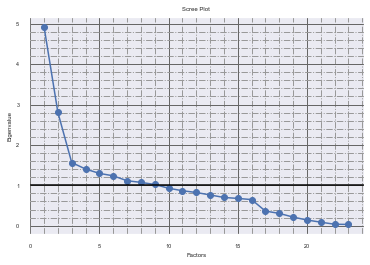

In [10]:
#plotting scree-plot:
plt.scatter(range(1,df_clean.shape[1]+1),ev)
plt.plot(range(1,df_clean.shape[1]+1),ev) 
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(1.0, color = 'black') #visualise which eigenvalues are above and below 1
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-.')
plt.show()
#visualisation of the 9 eigenvalues > 1.

What does the above mean?

Our naive Factor Analysis Approach involves us making a rough estimate on the number of Factors required in FA. The rough criteria is that the number of eigenvalues > 1 is the number of Factors we keep (Kaiser Criterion). However this criteria is <b>highly</b> disputed and shouldn't be gospel (Hayton, Allen & Scarpello, 2004).

For now, we'll perform FA on 9 factors.

<u>FA Rotation selection:</u>

General varimax rotation is chosen to maximise sum(variance of squared loadings) and ensure factors created are orthogonal (uncorrelated). However, imposing orthogonality on highly correlated factors is more 'unnatural'. Therefore, we will do an oblique rotation. The drawback of doing oblimin rotation is diminished interpretability of factors due to higher eigenvalues (IBM, 2014).

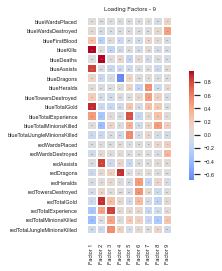

In [11]:
#Performing Factor Analysis:
fa2 = FactorAnalyzer(count, rotation="varimax")
fa2.fit(df_clean)
x_labels = ['Factor ' + str(i) for i in range(1,count+1)]
y_labels = df_clean.columns.tolist()
sns.set(font_scale=0.5)
plt.title('Loading Factors - ' + str(count))
load = sns.heatmap(fa2.loadings_,cmap="coolwarm", xticklabels = x_labels, yticklabels = y_labels, center=0, square=True, linewidths=.2,cbar_kws={"shrink": 0.5}, annot = True, annot_kws={"fontsize":1})

Ideally, we would like to see that each variable is highly correlated with only 1 factor. We can see from above that the wards placed/destroyed and first blood do not have a high enough factor loading for any of the 9 Factors (cut-off being 0.5). Furthermore, Factors 8 & 9 do not have a high enough loading for any variables.

Communality-Uniqueness Analysis:

Uniqueness is the variance that is 'unique' to the variable (not shared), while Communalities is the variance that is common to the variable (shared). Uniqueness + Communalities = 1.

Low Uniqueness/High Communality = Good. High Uniqueness/Low Communality = bad and should be under consideration for elimination. (Princeton University, 2020)

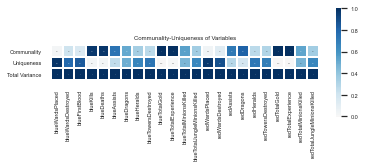

In [12]:
var_check = np.vstack((fa2.get_communalities(), fa2.get_uniquenesses(),np.array(fa2.get_communalities() + fa2.get_uniquenesses()))).tolist()
y_labels = ['Communality','Uniqueness', 'Total Variance']
x_labels = df_clean.columns.tolist()
sns.set(font_scale=0.5)
plt.title('Communality-Uniqueness of Variables')
load = sns.heatmap(var_check,cmap="RdBu", xticklabels = x_labels, yticklabels = y_labels, center=0, square=True, linewidths=.2,cbar_kws={"shrink": 0.5}, annot = True, annot_kws={"fontsize":1})

The very low Communality/high Uniqueness of variables strongly suggests the removal and the analysis be rerun (cut-off being 0.5). These variables for consideration include:

    1. Wards placed/destroyed for blue and red side (0.98, 0.79, 0.97, 0.88 Uniqueness)

    2. Who got first blood (0.84 Uniqueness)

    3. How many Heralds (0.66, 0.73 Uniqueness)

    4. Towers destroyed (0.73, 0.7 Uniqueness)

    5. Jungle minions destroyed (0.65, 0.65 Uniqueness)

There is enough justification to remove the mentioned variables:

    1. Low correlations in correlation matrix and with blueWins.

    2. None of the 9 proposed factors have high enough loadings for these mentioned variables above.

    3. Very low Communality

<b>We've now finished our 'psuedo' Factor Analysis. From the above, we will look to drop the mentioned variables, and we will perform a proper Factor Analysis after this:</b>

<b>Factor Analysis part 2:</b>

In [13]:
#dropping mentioned variables:
cols = ['blueWardsPlaced','blueWardsDestroyed','redWardsPlaced','redWardsDestroyed','blueFirstBlood', 'blueHeralds', 'redHeralds', 'blueTowersDestroyed', 'redTowersDestroyed', 'blueTotalJungleMinionsKilled', 'redTotalJungleMinionsKilled']
df_fa = df_clean.drop(cols,axis=1)

In [14]:
df_fa.head(10)

,blueKills,blueDeaths,blueAssists,blueDragons,blueTotalGold,blueTotalExperience,blueTotalMinionsKilled,redAssists,redDragons,redTotalGold,redTotalExperience,redTotalMinionsKilled
0,9,6,11,0,17210,17039,195,8,0,16567,17047,197
1,5,5,5,0,14712,16265,174,2,1,17620,17438,240
2,7,11,4,1,16113,16221,186,14,0,17285,17254,203
3,4,5,5,0,15157,17954,201,10,0,16478,17961,235
4,6,6,6,0,16400,18543,210,7,1,17404,18313,225
5,5,3,6,1,15899,18161,225,2,0,15201,18060,221
6,7,6,7,1,16874,16967,225,9,0,14463,15404,164
7,5,13,3,0,15305,16138,209,11,1,17920,16938,157
8,7,7,8,0,16401,18527,189,5,1,18380,19298,240
9,4,5,5,1,15057,16805,220,4,0,16605,18379,247


Observing the correlation matrix with reduced variables:

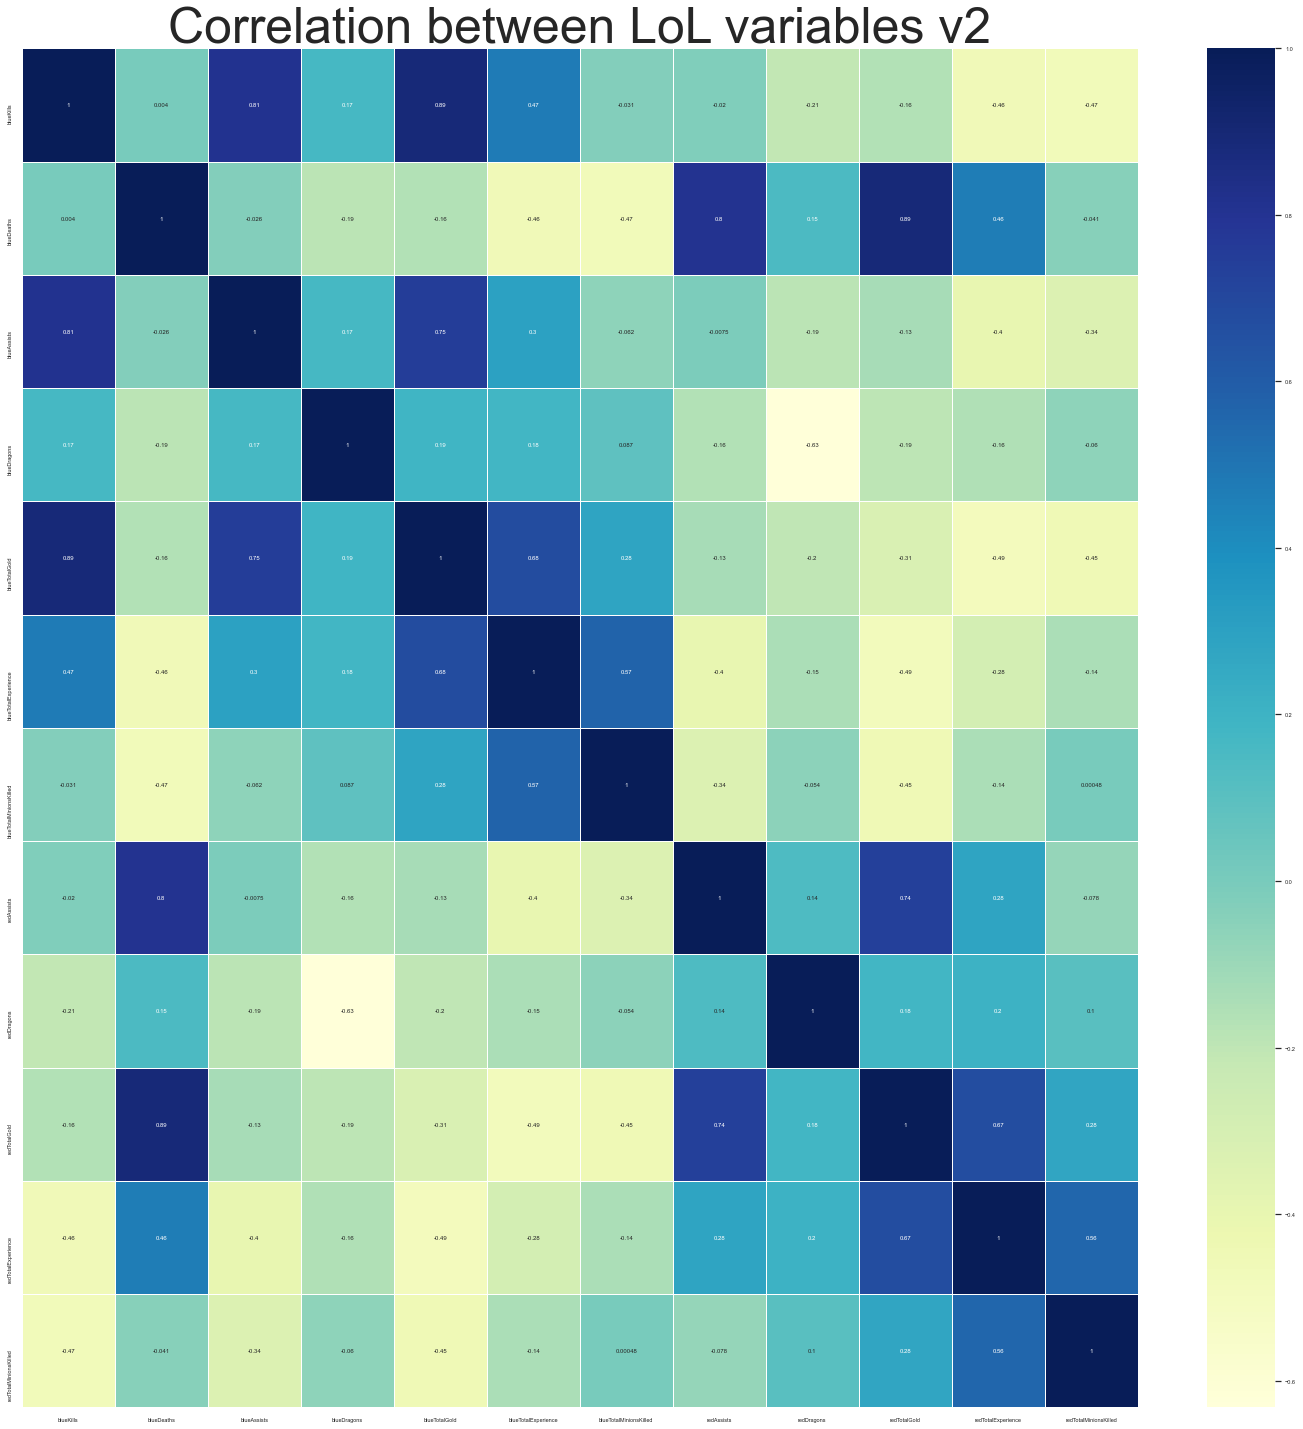

In [15]:
#Time to observe the correlation matrix of our dataset:
fig, ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(df_fa.corr(), annot=True, ax=ax, cmap="YlGnBu", linewidths = .5); ax.set_title("Correlation between LoL variables v2", fontsize = 50)
plt.show()
#We can see there is still high colinearity between some variables, but from the initial Factor Analysis, I can with good conscience say these variables have high communality and are relevant.

In an official and thorough Factor Analysis, we should perform a few tests to validate the justification in performing FA. We will perform two tests on our dataset (Hadi, Abdullah & Sentosa, 2016):

1. <b>Barlett's Test of Sphericity</b> - Checks if our correlation matrix is statistically similar to the Identity matrix. In other words, do our variables essentially have 0 relations with each other or not?

        We want to see a p-value < 0.05 to justify the suitability of FA.

2. <b>Kaiser-Meyer-Olkin (KMO) Test</b> - Checks if the inter-correlations between our variables are strong enough. Similar to Bartlett's test in checking if our variable correlations are sufficient.

        We want to see a KMO measure > 0.6 to justify the suitability of FA.

Performing Barlett's Test of Sphericity:

In [16]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(df_fa)

(100356.13289050745, 0.0)

    In this Bartlett's test, the p-value is 0. This means the test was statistically significant and the observed correlation matrix is not an identity matrix.

Performing the KMO Test - a measure of sampling adequacy (of the strength of inter-correlations among variables) which ranges from 0 to 1:

In [17]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_fa)
kmo_model

0.7430400148549441

    In this KMO test, the measure is 0.74. This value is considered good, which justifies suitability of factor analysis for the dataset.

Manually performing feature scaling before running the FA by ensuring our columns have an average mean of 0 and standard deviation of 1:

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_fas = sc.fit_transform(df_fa)

In [19]:
#Calculating eigenvalues and seeing which ones are greater than 1:
fa = FactorAnalyzer()
fa.fit(df_fas)
ev,v = fa.get_eigenvalues()
count = sum(1 for i in ev if i > 1)
print(count)
big_evs = sum(i for i in ev if i > 1)
total_evs = sum(ev)
print(big_evs)
print(float(big_evs/total_evs))


4
9.762739847929389
0.8135616539940993


An eigenvalue > 1 means that the factor explains more variance than a unique variable. Total eigenvalues > 1 = 4.

The total of eigenvalues = 9.76, with the 4 eigenvalues > 1 accounting for 81.36% of the total variance.

In [20]:
df_fas.shape

(9879, 12)

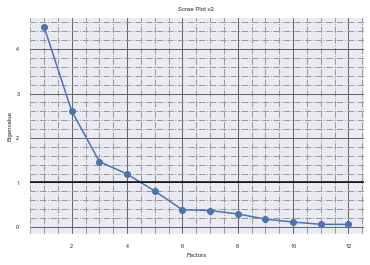

<Figure size 3600x3600 with 0 Axes>

In [58]:
#plotting scree-plot:
plt.scatter(range(1,df_fas.shape[1]+1),ev)
plt.plot(range(1,df_fas.shape[1]+1),ev) 
plt.title('Scree Plot v2')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(1.0, color = 'black') #visualise which eigenvalues are above and below 1
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-.')
plt.show()
#visualisation of the 4 eigenvalues > 1.

As mentioned before, we shouldn't rely only on the Kaiser Criterion. There are a lot of methods in retaining factors but there are three of them to utilise (Hayton, Allen & Scarpello, 2004):

    1. Kaiser criterion - if a factor's eigenvalues is above 1.0, we should retrain that factor.

    2. Screen plot - when is there a substantial decline in the magnitude of the eigenvalues?

    3. Parallel analysis - given the eigenvalue of the sample and eigenvalue of synthetic data with exact dimensionality of sample, count(the no. of eigenvalues of sample > no. of eigenvalues from synthetic) = retained number of factors.

Using the Kaiser Criterion alone is not good practice as overrelying on it can result in overestimating/underestimating the number of factors. Normally selecting 4 factors would suffice, but the Scree Plot suggests the 5th factor being close to 1 and not being the 'drop-off' point (significant drop-off at 6th factor, where 6th factor onwards plateaus) means there's an argument to actually keep 5 factors. (Li, Yang & Liu, 2018). Furthermore, Parallel Analysis is not conducted due to computational intensity.

Performing Factor Analysis and choosing rotation method:

General varimax rotation is chosen to maximise sum(variance of squared loadings) and ensure factors created are orthogonal (uncorrelated). However, imposing orthogonality on highly correlated factors is more 'unnatural'. Therefore, we will do an oblique rotation. The drawback of doing oblimin rotation is diminished interpretability of factors due to higher eigenvalues.

Because we have variables that have high loadings in factors (blueKills, blueDeaths, blueAssists, blueTotalGold, redAssists, redDragons, RedTotalGold) as well as variables that bleed into other factors (blueTotalExperience, redTotalExperience), we use the 'equamax' rotation method that minimizes both (IBM, 2014).

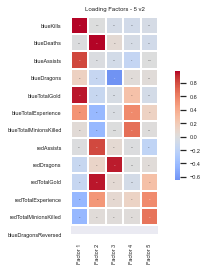

In [56]:
#Performing Factor Analysis:
fa2 = FactorAnalyzer(count+1, rotation="equamax")
fa2.fit(df_fas)
x_labels = ['Factor ' + str(i) for i in range(1,count+2)]
y_labels = df_fa.columns.tolist()
sns.set(font_scale=0.5)
plt.figure(figsize=(20,20))
plt.title('Loading Factors - ' + str(count+1) + ' v2')
load = sns.heatmap(fa2.loadings_,cmap="coolwarm", xticklabels = x_labels, yticklabels = y_labels, center=0, square=True, linewidths=.2,cbar_kws={"shrink": 0.5}, annot = True, annot_kws={"fontsize":1})

From the above information, we can interpret the 5 Factors as so:

    1. How many kills has Blue side had on Red?

    2. How many kills has Red side had on Blue?

    3. How many dragons has Blue side killed compared to Red side?

    4. How many last hits does Blue side have?

    5. How many last hits does Red side have?

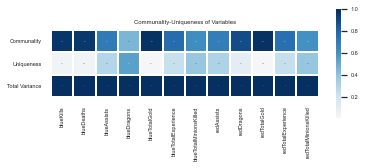

In [23]:
var_check = np.vstack((fa2.get_communalities(), fa2.get_uniquenesses(),np.array(fa2.get_communalities() + fa2.get_uniquenesses()))).tolist()
y_labels = ['Communality','Uniqueness', 'Total Variance']
x_labels = df_fa.columns.tolist()
sns.set(font_scale=0.5)
plt.title('Communality-Uniqueness of Variables')
load = sns.heatmap(var_check,cmap="RdBu", xticklabels = x_labels, yticklabels = y_labels, center=0, square=True, linewidths=.2,cbar_kws={"shrink": 0.5}, annot = True, annot_kws={"fontsize":1})

When communalities are all high, it indicates that the extracted components represent the Factors well. In our example, most communalities are very high, with the lowest communality in blueDragons = 0.46.

In [24]:
#Transform the data with our 5 new Factors:
transformed_df_fa = pd.DataFrame(fa2.transform(df_fas), columns = ['F1','F2','F3','F4','F5'])
transformed_df_fa.head()

,F1,F2,F3,F4,F5
0,0.803011,0.055040,-0.553358,-1.310943,-0.220478
1,-0.507834,-0.014188,1.039817,-2.162437,1.324160
2,0.056631,1.215652,-0.956111,-0.716385,-1.966798
3,-0.862808,-0.282349,-0.774720,-0.339435,0.122899
4,0.032342,0.231329,1.093674,0.146663,0.928272


There is one last assessment to perform called Cronbach's Alpha. It will measure how interanlly consistent our factors are in relation to how they are as a group. Our Factors will be acceptable when our Cronbach's Alpha is > 0.7 (Hilsdorf, 2020).

In [25]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

Firstly, any variables that are going in an opposite direction need to be reversed for the test:

In [26]:
df_fa['blueDragonsReversed'] = df_fa['blueDragons'].multiply(-1)
df_fa.head()

,blueKills,blueDeaths,blueAssists,blueDragons,blueTotalGold,blueTotalExperience,blueTotalMinionsKilled,redAssists,redDragons,redTotalGold,redTotalExperience,redTotalMinionsKilled,blueDragonsReversed
0,9,6,11,0,17210,17039,195,8,0,16567,17047,197,0
1,5,5,5,0,14712,16265,174,2,1,17620,17438,240,0
2,7,11,4,1,16113,16221,186,14,0,17285,17254,203,-1
3,4,5,5,0,15157,17954,201,10,0,16478,17961,235,0
4,6,6,6,0,16400,18543,210,7,1,17404,18313,225,0


Finally, return the cronbach alphas:

In [27]:
print(cronbach_alpha(df_fa[['blueKills','blueAssists','blueTotalGold']]))
print(cronbach_alpha(df_fa[['blueDeaths','redAssists','redTotalGold','redTotalExperience']]))
print(cronbach_alpha(df_fa[['blueDragonsReversed','redDragons']]))
print(cronbach_alpha(df_fa[['blueTotalExperience','blueTotalMinionsKilled']]))
print(cronbach_alpha(df_fa[['redTotalExperience','redTotalMinionsKilled']]))

0.9304907674635288
0.8767111891350496
0.7744575874162078
0.7268038367722004
0.7171140822935861


Looks like our cronbach alphas for our 5 factors is looking good! Therefore our factors are deemed acceptable.

<b>Performing Logistic Regression after Factor Analysis:</b>

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Splitting our training and test data:

In [29]:
x_train,x_test,y_train,y_test=train_test_split(transformed_df_fa,y,test_size=0.2,random_state=1)
final_LR=LogisticRegression()

In [30]:
final_LR.fit(x_train,y_train)

LogisticRegression()

Assessing the Accuracy of our model:

In [31]:
result_LR=final_LR.predict(x_test)
print(accuracy_score(result_LR,y_test))

0.7403846153846154


That means with the first 10 minutes of League data, we're able to predict the final outcome with a 74.04% accuracy.

Returning the confusion matrix (by row) of True Positives, False Negatives, False Positives & True Negatives:

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, result_LR)
print(confusion_matrix)

[[727 275]
 [238 736]]


Summarizing regression results:

In [33]:
import statsmodels.api as sm
logit_model=sm.Logit(y,transformed_df_fa)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.532773
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.231     
Dependent Variable: blueWins         AIC:              10536.5276
Date:               2021-07-27 15:59 BIC:              10572.5184
No. Observations:   9879             Log-Likelihood:   -5263.3   
Df Model:           4                LL-Null:          -6847.6   
Df Residuals:       9874             LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
F1        0.9637     0.0282    34.1873   0.0000    0.9084    1.0189
F2       -0.9513     0.0281   -33.9068   0.0000   -1.0063 

<u><b>Principal Component Analysis</b></u>

Defintion: <i>PCA can be defined as the orthogonal projection of the data to a lower dimensional linear space (principal subspace), while minimizing the mean squared distance between datapoints and the orthogonal projection while maximising the spread throughout the orthogonal projection (variance).</i> Extremely great writeup explaing PCA here: https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

How is Principal Component Analysis (PCA) different from FA?

1. Both methods are looking to make an approximation of a given covariance matrix. The fundamental mathematical difference between the two methods is this (Bishop, 2014):

   <b>PCA: C ≈ WW<sup>⊤</sup></b>

   <b>FA: C ≈ WW<sup>⊤</sup> + Ψ</b>

    Where C represents the covariance matrix of our dataset, W being a matrix of our data after deciding how many components to keep (like how we retained <i>'k'</i> factors in    FA) and Ψ the diagonal matrix. This diagonal matrix is the representation of uniqueness (total variance - communalities).  

2. In PCA, because of the absence of Ψ, we're not looking to determine a causal statement about the relationships. In FA, we're seek latent causes that will eventually be interpreted as the reason for our observed, measured variables. This is why in FA, we try to interpret and categorize the Factors. In PCA, not so much. We're simply finding a linear combination of our variables that create the 'Component', so there's no guarantee the Components are interpretable.

3. In FA, there are a lot of possible algorithms to choose from (depending on different assumptions). This can result in some algorithms resulting in a dead end (Heywood Case) and is a more of an art form than PCA. PCA, just perform eigen decomposition and you're done.

It is worth noting that as the dimensionality (n) of our dataset increases, the differences between PCA and FA decreases. However for a small <i>'n'</i>, the difference is significant (Carine, 2014).


The first necessary step in PCA is to scale our data. If this isn't done first, then we'll have trouble when dealing with variances.

In [34]:
#scaling our data similar to when doing FA:
df_clean_scaled = sc.fit_transform(df_clean)

In [35]:
#converting it back into a panda:
df_clean_scaled = pd.DataFrame(df_clean_scaled, columns = list(df_clean.columns))
df_clean_scaled.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0.316996,-0.379275,0.990429,0.935301,-0.046926,1.071495,-0.753226,-0.481132,-0.210439,0.460179,-0.740639,-0.992782,-1.465951,-0.399207,1.532493,0.329496,-0.838966,-0.436495,-0.198353,0.052293,-0.763215,-0.928741,0.367685
1,-0.570992,-0.839069,-1.009663,-0.393216,-0.387796,-0.404768,-0.753226,-0.481132,-0.210439,-1.166792,-1.385391,-1.953558,-0.758722,-0.561751,-0.805870,-1.148188,1.191944,2.290977,4.412301,0.758619,-0.436980,1.033784,0.068504
2,-0.404494,-1.298863,-1.009663,0.271042,1.657424,-0.650812,1.327623,-0.481132,-0.210439,-0.254307,-1.422043,-1.404543,-0.455624,-0.399207,0.129475,1.807181,-0.838966,-0.436495,-0.198353,0.533909,-0.590502,-0.654900,-2.324944
3,1.149484,-0.839069,-1.009663,-0.725346,-0.387796,-0.404768,-0.753226,2.078430,-0.210439,-0.876959,0.021567,-0.718275,0.453671,-0.399207,-0.338198,0.822058,-0.838966,-0.436495,-0.198353,-0.007406,-0.000609,0.805583,-0.430131
4,2.925460,0.540312,-1.009663,-0.061087,-0.046926,-0.158724,-0.753226,-0.481132,-0.210439,-0.067382,0.512211,-0.306513,0.655736,-0.290844,-0.338198,0.083215,1.191944,-0.436495,-0.198353,0.613731,0.293085,0.349182,1.564408


Before we decide how many PCA components, we need to know the criteria for how many components we should maintain. The cumulative variance to preserve our data seems to vary, but we'll choose the amount of components where 70-90% of the total variance is explained (Siswadi, Muslim & Bakhtiar, 2016). We'll explain in the discussion at the end of this of the alternative methods that determine how many PCA components to choose.

In [36]:
#computing the eigenvalues & eigenvectors and seeing how many will fall between the 70-90% variance:
eig_vals, eig_vecs = np.linalg.eig(df_clean_scaled.corr())
count_pca_floor = float('inf')
count_pca_ceiling = 0
total_pca = sum(eig_vals)
total_pca_running = 0
i = 0
eig_vals = np.sort(eig_vals)[::-1]
print(eig_vals)
while total_pca_running <= 0.90:
    if total_pca_running >= 0.70 and count_pca_floor == float('inf'):
        count_pca_floor = min(count_pca_floor,i)
    if total_pca_running + eig_vals[i]/total_pca > 0.90:
        break
    total_pca_running += eig_vals[i]/total_pca
    count_pca_ceiling += 1
    i += 1
#the set calculated tells us the range of components we should keep to maximise variance but also minimise our dimensions
(count_pca_floor,count_pca_ceiling)

[4.92618841 2.80487463 1.56287871 1.40293618 1.29504481 1.23440285
 1.11340883 1.0719702  1.02028585 0.92759043 0.86539076 0.82195434
 0.7609734  0.69860482 0.67549948 0.64586345 0.36161236 0.30409661
 0.21307479 0.14035585 0.08654841 0.03531333 0.0311315 ]


(9, 14)

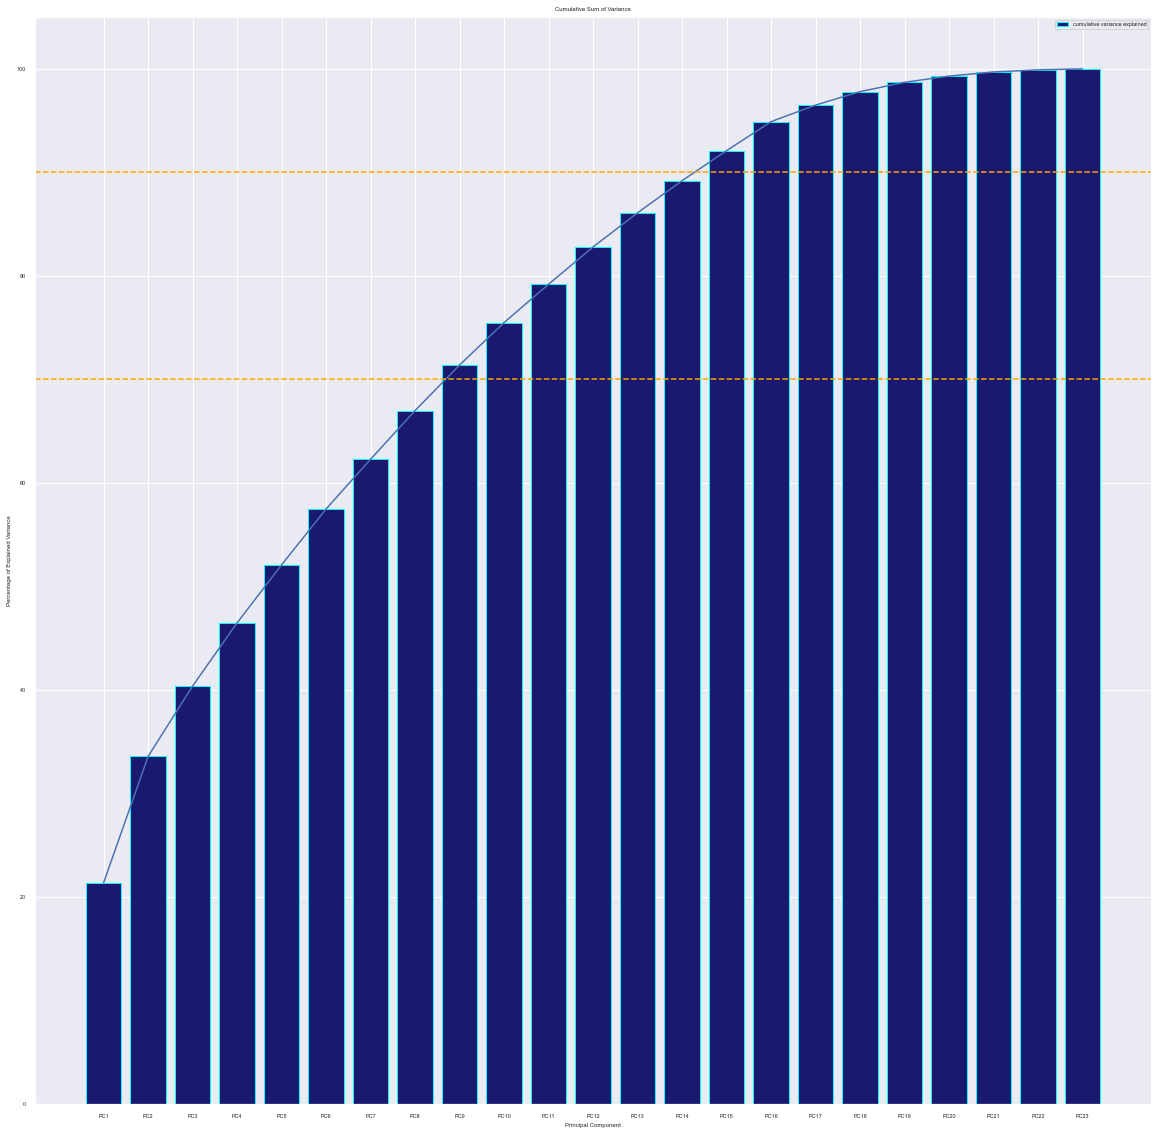

In [37]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_clean_scaled)
pca_data = pca.transform(df_clean_scaled)
percent_var = np.round(pca.explained_variance_ratio_.cumsum()*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(percent_var)+1)]
plt.figure(figsize=(20,20))
#cumulative variance explained:
plt.bar(x=range(1, len(percent_var)+1), height = percent_var, tick_label = labels, color='midnightblue', edgecolor='aqua', label = 'cumulative variance explained')
sns.lineplot(x=range(1, len(percent_var)+1), y = percent_var)
#benchmark of 70-90% variance explained:
plt.axhline(70.0, color = 'orange', linestyle="--")
plt.axhline(90.0, color = 'orange', linestyle="--")
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Cumulative Sum of Variance')
plt.show()

The cumulative variance explained shows there is evidence to keep at least 9 Principal Components. Becuase of this high number, we'll be unable to utilise one of PCA's advantages: its visualisations (best used for components under 4 since the human eye sees in 3D).

    We're going to start looking at the eigenvalues in the first few compoments and start to identify the features that correspond with the Components:

<b>Component 1:</b>

The output below suggests Component 1 is about Gold and Experience Difference


In [38]:
aa = pd.DataFrame({'feature':df_clean_scaled.columns, 'eigenvalue': abs(pca.components_[0])})
aa.sort_values(by='eigenvalue', ascending=False).head(10)

,feature,eigenvalue
9,blueTotalGold,0.360150
19,redTotalGold,0.351108
20,redTotalExperience,0.329977
10,blueTotalExperience,0.328705
3,blueKills,0.296681
4,blueDeaths,0.284713
5,blueAssists,0.254171
15,redAssists,0.238395
21,redTotalMinionsKilled,0.204204
11,blueTotalMinionsKilled,0.198975


<b>Component 2:</b>

The output below suggests Component 2 is about Kills/Deaths/Assists (K/D/A)

In [55]:
aa = pd.DataFrame({'feature':df_clean_scaled.columns, 'eigenvalue': abs(pca.components_[1])})
aa.sort_values(by='eigenvalue', ascending=False).head(10)

,feature,eigenvalue
4,blueDeaths,0.399472
3,blueKills,0.382186
15,redAssists,0.375484
5,blueAssists,0.357614
11,blueTotalMinionsKilled,0.281744
19,redTotalGold,0.280826
21,redTotalMinionsKilled,0.275170
9,blueTotalGold,0.260302
12,blueTotalJungleMinionsKilled,0.216488
22,redTotalJungleMinionsKilled,0.197737


<b>Component 3:</b>

The output below suggests Component 3 is about Elite Monster Kills. Interestingly, the eigenvalue for Herald kills is relatively small compared to Dragon kills, so we could conclude Component 3 is actually about Dragons taken instead.

In [40]:
aa = pd.DataFrame({'feature':df_clean_scaled.columns, 'eigenvalue': abs(pca.components_[2])})
aa.sort_values(by='eigenvalue', ascending=False).head(10)

,feature,eigenvalue
16,redDragons,0.616776
6,blueDragons,0.588809
7,blueHeralds,0.231895
22,redTotalJungleMinionsKilled,0.228584
8,blueTowersDestroyed,0.197198
11,blueTotalMinionsKilled,0.157546
10,blueTotalExperience,0.157364
9,blueTotalGold,0.151999
17,redHeralds,0.136178
18,redTowersDestroyed,0.126413


We can repeat the above steps to obtain the rest of the interpretations of our Components:

PC1: Gold/Exp Diff

PC2: K/D/A

PC3: Dragons Killed

PC4: Experience

PC5: Heralds Killed

PC6: Wards destroyed

PC7: Towers Destroyed

PC8: Wards Placed

PC9: Jungle Minions killed

PC10: (Eventually, the Compoments become less and less interpretable...)

With at least 70% of cumulative variance explained, the variance being < 1 after the 9th PC & the uninterpretability after the 9th PC and the 10th PC onwards having eigenvalues < 1, there is evidence to choose 9 Principal Components.

In [41]:
#apply PCA to the number of above components:
pca9 = PCA(n_components=9)
pca9_fit = pca9.fit_transform(df_clean_scaled)
df_pca = pd.DataFrame(data = pca9_fit, columns = ['PCA' + str(i) for i in range(1,10)])
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,0.573625,1.888198,-0.095012,1.172410,0.359885,1.048686,-0.956088,-1.405118,0.731719
1,-2.824436,-0.037914,-0.705562,1.294144,3.237705,-0.650482,3.045562,-1.040826,-0.960325
2,-1.412891,2.651762,-2.169134,1.433884,-1.726898,-1.152032,-0.071935,0.368015,-0.952472
3,-0.886280,-0.516732,-0.015532,0.112681,-1.900135,-1.153721,0.197320,-1.006593,-0.314628
4,-0.889433,-0.499951,1.375946,-0.932720,0.002250,0.727452,-0.984016,-1.465767,-0.976942


<b>Performing Logistic Regression after PCA:</b>

In [42]:
px_train,px_test,py_train,py_test=train_test_split(pca9_fit,y,test_size=0.2,random_state=1)
PCA_LR=LogisticRegression() 

In [43]:
PCA_LR.fit(px_train,py_train)

LogisticRegression()

In [44]:
result_PCALR=PCA_LR.predict(px_test)
print(accuracy_score(result_PCALR,py_test))

0.7343117408906883


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix_pca = confusion_matrix(py_test, result_PCALR)
print(confusion_matrix_pca)

[[725 277]
 [248 726]]


In [46]:
import statsmodels.api as sm
logit_model=sm.Logit(y,pca9_fit)
result2=logit_model.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.532432
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.232     
Dependent Variable: blueWins         AIC:              10537.8010
Date:               2021-07-27 15:59 BIC:              10602.5845
No. Observations:   9879             Log-Likelihood:   -5259.9   
Df Model:           8                LL-Null:          -6847.6   
Df Residuals:       9870             LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.6619      0.0148    44.7064    0.0000     0.6329     0.6909
x2    -0.0205      0.0144    -1.4296    0.1528    -0.0

<u><b>PCA retrospect and reconsiderations</b></u>

We've found a problem with our logistic regression - unsatisfactory p-values/z-scores in our Principal Components. There are clear signs of overemphasis on some contributions and underemphasis in others. The following attempts to explain why:

PCA is trying to achieve two things at the same time: Minimising the mean-squared error (MSE) of data points while also maximising the spread of variance. In other words - our resultant components should not only be an accurate interpretation/reconstruction of our variables (minimising MSE) but also construct new characteristics that strongly differ across variables (maximise variance). With that being said, let's pose two hypotheticals: What if our original dataset's variables had low colinearity? What if our original dataset's variables had high colinearity? (which our dataset has both).

If a dataset's features had little colinearity, PCA would be of almost no use to reduce dimensionality. If our dataset had 100 very unique and uncorrelated variables, then it would take 100 Principal Components to explain those 100 very unique and uncorrelated variables (Phan, 2016 pp. 6). This is why it's 'standard' practice to remove variables with low correlations, although this practice may be misleading and other approaches such as finding small subsets of original variables that approximate the various PCs in some optimal way (Silva, 2000). If a dataset's features had high colinearity, then the effect of adding more and more nearly correlated variables increases the contribution of the common underlying factor in PCA, causing PCA to overemphasise the contribution (Type2, 2013).

When analyzing how other individuals used PCA in this particular dataset in Kaggle, it seems like very little is addressed on these matters. Therefore, it may be preferable to search for small subsets of the original variables that approximate the relevant PCs in some optimal way (Silva, 2000). There are proposed algorithms and new criteria of what subsets of original variables will approximate the relevant PCs found in both Silva's <i>Discarding Variables in Principal Component Analysis: Algorithms for All-Subsets Comparisons</i> and Cadima & Jolliffe's <i>Variable selection and the interpretation of principal subspaces</i>.

However due to the computational intensity of either working out the criteria of each possible subset (2<sup>N</sup>-1 of non-empty subset possibilities), the ambiguity of choosing the specific subsets or the complexity of working out algorithms such as Yanai's GCD/McGabe's 4 Criterion from above, we won't touch this realm of PCA (at least in this notebook, maybe another one in the future?). Instead, we're going to narrow in to a much simpler method suggested by one of the same authors Jolliffe: the B2/B4 method (Joliffe, 2002, p. 138).



<u><b>PCA Selection methods</b></u>

The B2 procedure begins by doing PCA over our <i> n &#215; p</i> data matrix. If we choose to retain <i>q</i> Principal Components, then associate one variable with each of the last <i>p - q</i> variables. The <i>p - q</i> variables are then removed (Siswadi, Muslim & Bekhtiar, 2012). This can be done as a whole <i>p - q</i> block or one by one and performing multiple PCAs. Jolliffe explores the distinctive ways of deleting the variables and determines deleting en bloc consistently failed to select an appropriate subset for some simple correlation structures (Joliffe, 2002, p. 138).

The B4 procedure is associating one variable with each of the first <i>m</i> PCs, namely the variable not already chosen with the highest loading. This approach is complimentary to the B2 method, but also when there exists groups of highly correlated variables (which is almost all of our PCs) it is designed to select just one variable from each group.



In [47]:
#Attempting first step of B2 method to delete the highest-loading variable of the least important PC:
aa = pd.DataFrame({'feature':df_clean_scaled.columns, 'eigenvalue': abs(pca.components_[22])})
aa.sort_values(by='eigenvalue', ascending=False).head(10)

,feature,eigenvalue
9,blueTotalGold,0.626308
3,blueKills,0.511244
19,redTotalGold,0.406194
4,blueDeaths,0.331524
11,blueTotalMinionsKilled,0.160614
8,blueTowersDestroyed,0.102311
21,redTotalMinionsKilled,0.098164
12,blueTotalJungleMinionsKilled,0.091828
5,blueAssists,0.067327
18,redTowersDestroyed,0.066880


Unfortunately, what we see is that the last eigenvalue has variables which have high loadings in our first (most variance explained) & last (least variance explained) PC, making the B2 method not very viable. 

Therefore, we'll first start by using the B4 method to assign variables to the first 9 PCs, then assign the remaining variables (for rejection) that did not appear in the B4 method:

<b>Highest eigenvalue of first 9 Components:</b>

In [48]:
cols = []
for i in range(9):
    aa = pd.DataFrame({'feature':df_clean_scaled.columns, 'eigenvalue': abs(pca.components_[i])})
    x = aa.values.tolist()
    x.sort(key = lambda x: x[1], reverse = True)
    cols.append(x[0][0])
    print(x[0][0] + " : " + str(x[0][1]))
df_b4 = df_clean_scaled[cols]

blueTotalGold : 0.3601499423714829
blueDeaths : 0.39947225610739284
redDragons : 0.6167756903496918
redTotalExperience : 0.4129027585889496
redHeralds : 0.5283637734808044
blueWardsDestroyed : 0.6103978005779127
redTowersDestroyed : 0.5556661069719301
blueWardsPlaced : 0.6001595654034315
redTotalJungleMinionsKilled : 0.41855257672943913


<b>Performing Logistic Regression after B4 Method:</b>

In [49]:
bx_train,bx_test,by_train,by_test=train_test_split(df_b4,y,test_size=0.2,random_state=1)
B4_LR=LogisticRegression()

In [50]:
B4_LR.fit(bx_train,by_train)

LogisticRegression()

In [51]:
result_B4LR=B4_LR.predict(bx_test)
print(accuracy_score(result_B4LR,by_test))

0.7373481781376519


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix_b4 = confusion_matrix(by_test, result_B4LR)
print(confusion_matrix_b4)

[[732 270]
 [249 725]]


In [53]:
import statsmodels.api as sm
logit_model=sm.Logit(y,df_b4)
result3=logit_model.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.535608
         Iterations 6
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.227     
Dependent Variable:      blueWins            AIC:                 10600.5498
Date:                    2021-07-27 15:59    BIC:                 10665.3333
No. Observations:        9879                Log-Likelihood:      -5291.3   
Df Model:                8                   LL-Null:             -6847.6   
Df Residuals:            9870                LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          6.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
blueT

Some of our p-values/z-scores are still unsatisfactory but much better than our initial PCA regression model.

<u><b> FA vs PCA Discussion:</b></u>

PCA compared to FA seems to be much more rigorously studied - with other researchers disputing the variance cutoff of our Kaiser Criterion (while we based our selections on λ<sub>x</sub> < 1, other researchers suggest cutoffs of 0.6-0.7) as well as introducing other criteria such as the broken-stick distribution (King & Jackson, 1999). I did perform a comparison of our PCA's explained variance ratio vs the broken-stick distribution. However when comparing the two, only the first two variances/eigenvalues were greater than the first two values, suggesting we only retain two variables. While this may be of discussion, we ignored the results in this notebook as two PCs could only explain a maximum of around 33%. Furthermore, Bartkowiak with an empirical comparison shows us that most of the rules lead to similar decisions on how many components/variables to keep - except the broken stick rule (Jolliffe, 2002 p. 132).

Because FA considers communality (while PCA doesn't), it makes it easier to distinguish variables which we should inherently remove after one iteration. We can see that using logistic regression after the B4 method results in some variables with higher p-values (blueWardsDestroyed, blueWardsPlaced, redTotalJungleMinionsKilled) - variables FA has already analyzed and has deemed unfit to use. While there are ways around this in PCA by analyzing multiple criteria and subsets, it seems like FA has been overall more effective in our notebook.

<u><b>Conclusion:</b></u>

Gold accumulation through early kills/solid last-hitting as well as securing early dragon kills maximises your chances in winning your League of Legends games.

The first 10 minutes of almost 10000 diamond-ranked games were analyzed through Factor Analysis and Principal Component Analysis. While both have their unique pros & cons - Factor Analysis proved to be more effective at analysing our dataset for latent variables while still achieving dimensionality reduction.

<b><u>References:</u></b>

1. Bishop, C.M. (2006) <i>Pattern Recognition and Machine Learning</i> pp. 584

2. Cadima, J.F.C.L & Jolliffe, I.T (1995) <i>Variable selection and the interpretation of principal subspaces</i> - Journal of Agricultural Biological and Environmental Statistics

3. Carine (2014) <i>Is there any good reason to use PCA instead of EFA? Also, can PCA be a substitute for factor analysis?</i>  Stack Exchange - Stats

4. Centre for Academic Success (2017) <i>Advice on Exploratory Factor Analysis</i>. Birmingham City University pp.2

5. Ferrari, S. (2013) <i>From Generative to Conventional Play: MOBA and League of Legends</i>. Georgia Institute of Technology

6. Hadi, N.U., Abdullah, N. & Sentosa, I. (2016) <i>An Easy Approach to Exploratory Factor Analysis: Marketing Perspective</i>. Rome-Italy: Journal of Education and Social Research, MSCER Publishing

7. Hayton, J.C., Allen D.G. & Scarpello, V. (2004) <i>Factor Retention Decisions in Exploratory Factor Analysis: A Tutorial on Parallel Analysis</i>. Sage Publications

8. Hilsdorf, M. (2020) <i>Cronbach’s Alpha: Theory and Application in Python</i>. Towards data science

9. IBM (2014) <i>Factor Analysis Rotation</i>. SPSS Statistics - 23.0.0

10. Joliffe, I.T. (2002) <i>Principal Component Analysis, Second Edition</i>. Springer

11. King, J.R. & Jackson, D.A. (1999) <i>Variable Selection in Large Environmental Data Sets using Principal Components Analysis</i>. Environmetrics

12. Li, J., Yang, M. & Liu, B. (2018) <i>Factor Analysis</i>. jbhender - github

13. Princeton University (2020) <i>Manuals - mvfactor</i>. stata.com

14. Silva, A.P.D (2000) <i>Discarding Variables in Principal Component Analysis: Algorithms for All-Subsets Comparisons</i>. The Catholic University of Portugal

15. Siswadi, Muslim, A. & Bakhtiar, T. (2012) <i>Variable Selection Using Principal Component and Procrustes Analyses and its Application in Educational Data</i>. Journal of Asian Scientific Research

16. Type2 (2013) <i>Should one remove highly correlated variables before doing PCA?</i>  Stack Exchange - Stats